In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import hjb_modified

Equation with damage function $j$:

\begin{align}
0 = \max_e \min_{h_2} &-\delta \phi(y,z_2) + \delta\eta\log e  + \frac{\partial \phi}{\partial y}(y, z_2) z_2 e\\
&+ \left[\frac{\partial \phi}{\partial z_2}(y, z_2)\right]\left[-\rho(z_2 -  \mu_{2}) \right] + \left[\frac{\partial^2 \phi}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)\\
& + (\eta-1)\left(\frac{d}{d \tau}\Lambda_j(y)z_2 e\right)\\
\end{align}

where

\begin{equation}
\Lambda_j(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2,j}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y, z_2)z_2 + (\eta-1)\frac{d}{d \tau}\Lambda_j(y)z_2}
$$

In [24]:
# Model parameters
η = .032
δ = .01
# Z process
μ_2 = 1.86/1000.
ρ = 0.9
σ_2 = np.sqrt(2*ρ/10416.29)
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.
λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])

# Capital and z parameters
α_k = -0.043
β_k = 0.04
σ_k = np.array([0.477*2, 0])/100.
β_z = 0.014*4
σ_z = np.array([0.011*2, 0.025*2])
α = 0.115
ioverk = 0.09
κ = 6.667

In [13]:
# Grid setting
n_z = 50
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

n_y = 50
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_state = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, η, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, _ = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None,
                           ϵ=.5, tol=1e-8, max_iter=10_000, use_python=False)
    ϕ_state.append(ϕ)

Iteration 1: LHS Error: 0.0014451636931549635; RHS Error 0.0018258099200731185
Iteration 2: LHS Error: 0.0013259298265649209; RHS Error 0.0015870481258874083
Iteration 3: LHS Error: 0.0012489890928941943; RHS Error 0.0014341936562414616
Iteration 4: LHS Error: 0.0011924643904215274; RHS Error 0.0013256548324169116
Iteration 5: LHS Error: 0.0011464755682885977; RHS Error 0.0012433684624314108
Iteration 6: LHS Error: 0.0011067084717271735; RHS Error 0.0011782676056142274
Iteration 7: LHS Error: 0.0010714123281512257; RHS Error 0.001125323000374886
Iteration 8: LHS Error: 0.0010398559227960246; RHS Error 0.0010814396887144214
Iteration 9: LHS Error: 0.001011608054127408; RHS Error 0.0010445063040953764
Iteration 10: LHS Error: 0.0009862799201139985; RHS Error 0.0010129711800735076
Iteration 11: LHS Error: 0.0009634783799504117; RHS Error 0.0009856532271039168
Iteration 12: LHS Error: 0.0009428251125487702; RHS Error 0.0009616462935188826
Iteration 13: LHS Error: 0.000923979829729981; RHS 

Iteration 104: LHS Error: 0.0003821947182761354; RHS Error 0.00038315868560485076
Iteration 105: LHS Error: 0.00037935203381424254; RHS Error 0.00038030243250018265
Iteration 106: LHS Error: 0.000376536592990695; RHS Error 0.00037747370085993424
Iteration 107: LHS Error: 0.0003737479977524022; RHS Error 0.0003746720812276156
Iteration 108: LHS Error: 0.0003709858604054872; RHS Error 0.0003718971790635691
Iteration 109: LHS Error: 0.0003682498004889956; RHS Error 0.00036914860959952507
Iteration 110: LHS Error: 0.00036553944769754376; RHS Error 0.0003664259919470873
Iteration 111: LHS Error: 0.0003628544397792782; RHS Error 0.0003637289582328897
Iteration 112: LHS Error: 0.0003601944226060555; RHS Error 0.0003610571476126799
Iteration 113: LHS Error: 0.00035755904959919316; RHS Error 0.00035841020945857606
Iteration 114: LHS Error: 0.0003549479823503898; RHS Error 0.00035578779607930554
Iteration 115: LHS Error: 0.0003523608894635405; RHS Error 0.0003531895717556726
Iteration 116: LHS E

Iteration 209: LHS Error: 0.00018472239089467601; RHS Error 0.00018501643640849905
Iteration 210: LHS Error: 0.00018351403174793335; RHS Error 0.00018380529408174517
Iteration 211: LHS Error: 0.00018231441319931097; RHS Error 0.00018260292590066628
Iteration 212: LHS Error: 0.0001811234600793965; RHS Error 0.00018140925126624576
Iteration 213: LHS Error: 0.00017994109795706204; RHS Error 0.00018022420294736214
Iteration 214: LHS Error: 0.00017876725352779232; RHS Error 0.0001790477051751469
Iteration 215: LHS Error: 0.00017760185400894635; RHS Error 0.00017787967759375078
Iteration 216: LHS Error: 0.00017644482754171353; RHS Error 0.00017672005507169417
Iteration 217: LHS Error: 0.00017529610311842192; RHS Error 0.0001755687645065314
Iteration 218: LHS Error: 0.00017415561062578133; RHS Error 0.00017442573687253605
Iteration 219: LHS Error: 0.00017302328267176925; RHS Error 0.00017329090095262077
Iteration 220: LHS Error: 0.00017189904462695804; RHS Error 0.00017216418005528084
Iterati

Iteration 312: LHS Error: 9.575384873584947e-05; RHS Error 9.587395653675509e-05
Iteration 313: LHS Error: 9.51590133368152e-05; RHS Error 9.527815588428233e-05
Iteration 314: LHS Error: 9.456808850269449e-05; RHS Error 9.468627738029654e-05
Iteration 315: LHS Error: 9.398104505758953e-05; RHS Error 9.409828797425027e-05
Iteration 316: LHS Error: 9.339785516555843e-05; RHS Error 9.35141611549332e-05
Iteration 317: LHS Error: 9.28184897183576e-05; RHS Error 9.293386342331842e-05
Iteration 318: LHS Error: 9.224292314402582e-05; RHS Error 9.235737589991053e-05
Iteration 319: LHS Error: 9.167112690873502e-05; RHS Error 9.178466614432159e-05
Iteration 320: LHS Error: 9.110307454171518e-05; RHS Error 9.12157097449726e-05
Iteration 321: LHS Error: 9.053873883052566e-05; RHS Error 9.065047861780398e-05
Iteration 322: LHS Error: 8.99780942344025e-05; RHS Error 9.008894522681565e-05
Iteration 323: LHS Error: 8.942111419764365e-05; RHS Error 8.953108607055184e-05
Iteration 324: LHS Error: 8.88677

Iteration 418: LHS Error: 4.999146709898372e-05; RHS Error 5.004474180566817e-05
Iteration 419: LHS Error: 4.969016726204256e-05; RHS Error 4.974305175900614e-05
Iteration 420: LHS Error: 4.939074989221415e-05; RHS Error 4.9443248312005866e-05
Iteration 421: LHS Error: 4.90932032700675e-05; RHS Error 4.914531866739521e-05
Iteration 422: LHS Error: 4.8797515799337e-05; RHS Error 4.884925226065486e-05
Iteration 423: LHS Error: 4.850367485464968e-05; RHS Error 4.855503340874944e-05
Iteration 424: LHS Error: 4.8211670809455986e-05; RHS Error 4.8262651382640514e-05
Iteration 425: LHS Error: 4.7921483112306484e-05; RHS Error 4.797209784607019e-05
Iteration 426: LHS Error: 4.7633107503927685e-05; RHS Error 4.768335246207176e-05
Iteration 427: LHS Error: 4.734653063488692e-05; RHS Error 4.739640962361162e-05
Iteration 428: LHS Error: 4.70617400914336e-05; RHS Error 4.711125511825331e-05
Iteration 429: LHS Error: 4.67787239302464e-05; RHS Error 4.682788142129494e-05
Iteration 430: LHS Error: 4.

Iteration 524: LHS Error: 2.6515147522970794e-05; RHS Error 2.6540323110008503e-05
Iteration 525: LHS Error: 2.6358477220211896e-05; RHS Error 2.638348161778921e-05
Iteration 526: LHS Error: 2.620275683370976e-05; RHS Error 2.6227589151425214e-05
Iteration 527: LHS Error: 2.604798043669143e-05; RHS Error 2.6072641768742346e-05
Iteration 528: LHS Error: 2.589414205597662e-05; RHS Error 2.5918633351060174e-05
Iteration 529: LHS Error: 2.5741235862741796e-05; RHS Error 2.5765557093568726e-05
Iteration 530: LHS Error: 2.55892559693216e-05; RHS Error 2.5613411767836367e-05
Iteration 531: LHS Error: 2.5438196524105172e-05; RHS Error 2.5462186354634816e-05
Iteration 532: LHS Error: 2.528805176066351e-05; RHS Error 2.5311877936845376e-05
Iteration 533: LHS Error: 2.513881584025046e-05; RHS Error 2.516247855658977e-05
Iteration 534: LHS Error: 2.4990490904458484e-05; RHS Error 2.5013982492845272e-05
Iteration 535: LHS Error: 2.484305499203532e-05; RHS Error 2.4866381951986764e-05
Iteration 536:

Iteration 626: LHS Error: 1.4549194209734218e-05; RHS Error 1.4561845840420557e-05
Iteration 627: LHS Error: 1.4464395629742999e-05; RHS Error 1.4476963593745623e-05
Iteration 628: LHS Error: 1.4380101018077185e-05; RHS Error 1.439258603963035e-05
Iteration 629: LHS Error: 1.4296307310479595e-05; RHS Error 1.4308709164413485e-05
Iteration 630: LHS Error: 1.4213011476277293e-05; RHS Error 1.4225331293752828e-05
Iteration 631: LHS Error: 1.4130210426122058e-05; RHS Error 1.4142449988714775e-05
Iteration 632: LHS Error: 1.404790115258625e-05; RHS Error 1.4060059082497125e-05
Iteration 633: LHS Error: 1.3966080677829673e-05; RHS Error 1.3978158895329613e-05
Iteration 634: LHS Error: 1.3884745979492186e-05; RHS Error 1.3896744842046226e-05
Iteration 635: LHS Error: 1.3803894128541772e-05; RHS Error 1.3815813132690442e-05
Iteration 636: LHS Error: 1.3723522173728075e-05; RHS Error 1.3735362896077409e-05
Iteration 637: LHS Error: 1.3643627182272078e-05; RHS Error 1.3655390030881836e-05
Iterat

Iteration 728: LHS Error: 8.040447269222484e-06; RHS Error 8.046948283595688e-06
Iteration 729: LHS Error: 7.994066366215358e-06; RHS Error 8.000527456939106e-06
Iteration 730: LHS Error: 7.947956743525886e-06; RHS Error 7.954378209755518e-06
Iteration 731: LHS Error: 7.90211728894652e-06; RHS Error 7.908493592296314e-06
Iteration 732: LHS Error: 7.856546350423765e-06; RHS Error 7.862884694171085e-06
Iteration 733: LHS Error: 7.811242298150223e-06; RHS Error 7.817538864851744e-06
Iteration 734: LHS Error: 7.766203303047337e-06; RHS Error 7.772460769131582e-06
Iteration 735: LHS Error: 7.721427868923048e-06; RHS Error 7.727645278998762e-06
Iteration 736: LHS Error: 7.676914477935948e-06; RHS Error 7.683092255227194e-06
Iteration 737: LHS Error: 7.632661485970638e-06; RHS Error 7.638800575737888e-06
Iteration 738: LHS Error: 7.58866737003705e-06; RHS Error 7.594764674748308e-06
Iteration 739: LHS Error: 7.5449309262232145e-06; RHS Error 7.55099127379465e-06
Iteration 740: LHS Error: 7.50

Iteration 830: LHS Error: 4.4675510185582246e-06; RHS Error 5.91283911065537e-06
Iteration 831: LHS Error: 4.441986287337385e-06; RHS Error 5.938055176185489e-06
Iteration 832: LHS Error: 4.416569637857859e-06; RHS Error 5.963122926219873e-06
Iteration 833: LHS Error: 4.391300171019408e-06; RHS Error 5.988048344461637e-06
Iteration 834: LHS Error: 4.3661770184055815e-06; RHS Error 6.01282910312243e-06
Iteration 835: LHS Error: 4.3411993160547e-06; RHS Error 6.037466143063788e-06
Iteration 836: LHS Error: 4.3163662057921215e-06; RHS Error 6.06196031349834e-06
Iteration 837: LHS Error: 4.2916768408785e-06; RHS Error 6.086312773263651e-06
Iteration 838: LHS Error: 4.267130389035145e-06; RHS Error 6.110524204130333e-06
Iteration 839: LHS Error: 4.242725980652118e-06; RHS Error 6.134598086849881e-06
Iteration 840: LHS Error: 4.218462800215095e-06; RHS Error 6.158529930255525e-06
Iteration 841: LHS Error: 4.194340057869783e-06; RHS Error 6.1823252732679315e-06
Iteration 842: LHS Error: 4.170

Iteration 937: LHS Error: 2.422770539411978e-06; RHS Error 7.93027360284455e-06
Iteration 938: LHS Error: 2.4089941024485473e-06; RHS Error 7.943870378341288e-06
Iteration 939: LHS Error: 2.3952968881413295e-06; RHS Error 7.957388977341065e-06
Iteration 940: LHS Error: 2.381678455787295e-06; RHS Error 7.970829865337412e-06
Iteration 941: LHS Error: 2.3681383557738744e-06; RHS Error 7.984193507000947e-06
Iteration 942: LHS Error: 2.3546761395848437e-06; RHS Error 7.997480325104816e-06
Iteration 943: LHS Error: 2.3412913581905004e-06; RHS Error 8.010690804879797e-06
Iteration 944: LHS Error: 2.3279835609235633e-06; RHS Error 8.023825389204048e-06
Iteration 945: LHS Error: 2.3147522956457056e-06; RHS Error 8.036884531969699e-06
Iteration 946: LHS Error: 2.3015971162276827e-06; RHS Error 8.04986870272628e-06
Iteration 947: LHS Error: 2.288517572932025e-06; RHS Error 8.062778312348034e-06
Iteration 948: LHS Error: 2.275513216493108e-06; RHS Error 8.075613835968783e-06
Iteration 949: LHS Err

Iteration 1049: LHS Error: 1.2817222575234322e-06; RHS Error 9.056806727605199e-06
Iteration 1050: LHS Error: 1.274475791734897e-06; RHS Error 9.063963126653644e-06
Iteration 1051: LHS Error: 1.2672706996424976e-06; RHS Error 9.071078299838003e-06
Iteration 1052: LHS Error: 1.2601069415002497e-06; RHS Error 9.078152144136086e-06
Iteration 1053: LHS Error: 1.2529840063002506e-06; RHS Error 9.085186581597434e-06
Iteration 1054: LHS Error: 1.2459015960863962e-06; RHS Error 9.0921812795422e-06
Iteration 1055: LHS Error: 1.2388595051343598e-06; RHS Error 9.09913627098087e-06
Iteration 1056: LHS Error: 1.2318575025038747e-06; RHS Error 9.106051702296569e-06
Iteration 1057: LHS Error: 1.2249617232645837e-06; RHS Error 9.112927845756746e-06
Iteration 1058: LHS Error: 1.2179763921177367e-06; RHS Error 9.119767495867782e-06
Iteration 1059: LHS Error: 1.211137010154184e-06; RHS Error 9.126561029115235e-06
Iteration 1060: LHS Error: 1.204272150293062e-06; RHS Error 9.133321332643147e-06
Iteration 

Iteration 1156: LHS Error: 6.996530912128929e-07; RHS Error 9.631780019042592e-06
Iteration 1157: LHS Error: 6.957135801899383e-07; RHS Error 9.635672305306937e-06
Iteration 1158: LHS Error: 6.917963998459564e-07; RHS Error 9.639542559703633e-06
Iteration 1159: LHS Error: 6.879013863675398e-07; RHS Error 9.643391001910688e-06
Iteration 1160: LHS Error: 6.840286980447363e-07; RHS Error 9.647217595049615e-06
Iteration 1161: LHS Error: 6.801778071052755e-07; RHS Error 9.6510213941504e-06
Iteration 1162: LHS Error: 6.763482764821083e-07; RHS Error 9.65480572596468e-06
Iteration 1163: LHS Error: 6.725409933405757e-07; RHS Error 9.658567881296086e-06
Iteration 1164: LHS Error: 6.687551514505952e-07; RHS Error 9.662307587488591e-06
Iteration 1165: LHS Error: 6.649903349087438e-07; RHS Error 9.666028025694367e-06
Iteration 1166: LHS Error: 6.612471143002674e-07; RHS Error 9.669726754535368e-06
Iteration 1167: LHS Error: 6.575251040863428e-07; RHS Error 9.673404417227544e-06
Iteration 1168: LHS

Iteration 1265: LHS Error: 3.785605695444394e-07; RHS Error 9.94916062875724e-06
Iteration 1266: LHS Error: 3.7638834526898535e-07; RHS Error 9.951256479993724e-06
Iteration 1267: LHS Error: 3.742510380488895e-07; RHS Error 9.953346115342595e-06
Iteration 1268: LHS Error: 3.721378729754088e-07; RHS Error 9.95542386020092e-06
Iteration 1269: LHS Error: 3.7004304762056073e-07; RHS Error 9.957488725138158e-06
Iteration 1270: LHS Error: 3.679645121934527e-07; RHS Error 9.959541022293728e-06
Iteration 1271: LHS Error: 3.658996594740893e-07; RHS Error 9.96158127190578e-06
Iteration 1272: LHS Error: 3.638471578054636e-07; RHS Error 9.963609847247557e-06
Iteration 1273: LHS Error: 3.6180640217153837e-07; RHS Error 9.965627012984302e-06
Iteration 1274: LHS Error: 3.5977713269685907e-07; RHS Error 9.967632902190991e-06
Iteration 1275: LHS Error: 3.57759247796019e-07; RHS Error 9.969627621950585e-06
Iteration 1276: LHS Error: 3.5575266614518153e-07; RHS Error 9.97161125322393e-06
Iteration 1277: 

Iteration 1366: LHS Error: 2.1448703872717356e-07; RHS Error 1.0111254650385778e-05
Iteration 1367: LHS Error: 2.132847786440184e-07; RHS Error 1.0112443380432034e-05
Iteration 1368: LHS Error: 2.1208924846916055e-07; RHS Error 1.0113625435642258e-05
Iteration 1369: LHS Error: 2.109004206829468e-07; RHS Error 1.011480083940963e-05
Iteration 1370: LHS Error: 2.0971825638593788e-07; RHS Error 1.0115969636170395e-05
Iteration 1371: LHS Error: 2.0854272599069024e-07; RHS Error 1.0117131848254995e-05
Iteration 1372: LHS Error: 2.0737379263779943e-07; RHS Error 1.0118287528517421e-05
Iteration 1373: LHS Error: 2.0621142275689675e-07; RHS Error 1.0119436698285012e-05
Iteration 1374: LHS Error: 2.050555842347812e-07; RHS Error 1.0120579395637768e-05
Iteration 1375: LHS Error: 2.0390624182187178e-07; RHS Error 1.0121715660158176e-05
Iteration 1376: LHS Error: 2.027633601991985e-07; RHS Error 1.0122845521235053e-05
Iteration 1377: LHS Error: 2.0162690611558176e-07; RHS Error 1.0123969017676983e-

Iteration 1475: LHS Error: 1.1868617752486266e-07; RHS Error 1.0208200212161135e-05
Iteration 1476: LHS Error: 1.1691841238226086e-07; RHS Error 1.020884178953808e-05
Iteration 1477: LHS Error: 1.157351845609833e-07; RHS Error 1.0209496279610245e-05
Iteration 1478: LHS Error: 1.1481954921566118e-07; RHS Error 1.02101593599344e-05
Iteration 1479: LHS Error: 1.1404116698199296e-07; RHS Error 1.0210813619166694e-05
Iteration 1480: LHS Error: 1.1333367348764778e-07; RHS Error 1.0211458710371974e-05
Iteration 1481: LHS Error: 1.1265881272315426e-07; RHS Error 1.0212101609291622e-05
Iteration 1482: LHS Error: 1.1200103072761536e-07; RHS Error 1.0212739831031402e-05
Iteration 1483: LHS Error: 1.11353577761375e-07; RHS Error 1.0213372698440054e-05
Iteration 1484: LHS Error: 1.1071347677527044e-07; RHS Error 1.0214000344811345e-05
Iteration 1485: LHS Error: 1.1007918389316362e-07; RHS Error 1.0214623032443922e-05
Iteration 1486: LHS Error: 1.094499727516407e-07; RHS Error 1.0215240984633991e-05

Iteration 1590: LHS Error: 6.098982782698492e-08; RHS Error 1.0263055719821057e-05
Iteration 1591: LHS Error: 6.064855917475853e-08; RHS Error 1.0263393023541168e-05
Iteration 1592: LHS Error: 6.030919537380885e-08; RHS Error 1.0263728450005767e-05
Iteration 1593: LHS Error: 5.997172632110637e-08; RHS Error 1.0264062001944874e-05
Iteration 1594: LHS Error: 5.9636140706254e-08; RHS Error 1.026439368757479e-05
Iteration 1595: LHS Error: 5.9302428342955515e-08; RHS Error 1.0264723524270724e-05
Iteration 1596: LHS Error: 5.897057929471483e-08; RHS Error 1.026505151665311e-05
Iteration 1597: LHS Error: 5.864058293114649e-08; RHS Error 1.02653776783675e-05
Iteration 1598: LHS Error: 5.831242867737618e-08; RHS Error 1.0265702020668998e-05
Iteration 1599: LHS Error: 5.79861065275189e-08; RHS Error 1.0266024547643743e-05
Iteration 1600: LHS Error: 5.7661606517322994e-08; RHS Error 1.026634527378405e-05
Iteration 1601: LHS Error: 5.7338918585392307e-08; RHS Error 1.0266664210430458e-05
Iteration

Iteration 1697: LHS Error: 3.345364485429769e-08; RHS Error 1.0290363195668024e-05
Iteration 1698: LHS Error: 3.3266372781448617e-08; RHS Error 1.0290547240864208e-05
Iteration 1699: LHS Error: 3.308042792471433e-08; RHS Error 1.0290731101529615e-05
Iteration 1700: LHS Error: 3.289552633067849e-08; RHS Error 1.0290913633484444e-05
Iteration 1701: LHS Error: 3.2711716460576135e-08; RHS Error 1.0291094869860611e-05
Iteration 1702: LHS Error: 3.252896693672902e-08; RHS Error 1.0291274979334604e-05
Iteration 1703: LHS Error: 3.234724396672384e-08; RHS Error 1.0291454067948552e-05
Iteration 1704: LHS Error: 3.216651864312858e-08; RHS Error 1.0291632195840112e-05
Iteration 1705: LHS Error: 3.198678447113856e-08; RHS Error 1.0291809368247282e-05
Iteration 1706: LHS Error: 3.1808029876678745e-08; RHS Error 1.0291985594560772e-05
Iteration 1707: LHS Error: 3.163024915597834e-08; RHS Error 1.0292160875252426e-05
Iteration 1708: LHS Error: 3.145343571708814e-08; RHS Error 1.0292335223204517e-05
I

Iteration 1809: LHS Error: 1.7817857661528436e-08; RHS Error 1.0305788460601446e-05
Iteration 1810: LHS Error: 1.771783605941657e-08; RHS Error 1.03058867356909e-05
Iteration 1811: LHS Error: 1.761861960491995e-08; RHS Error 1.0305984520321554e-05
Iteration 1812: LHS Error: 1.7519255282594237e-08; RHS Error 1.0306082603742063e-05
Iteration 1813: LHS Error: 1.7421738843226287e-08; RHS Error 1.0306180158936888e-05
Iteration 1814: LHS Error: 1.7323590173479175e-08; RHS Error 1.030627547282518e-05
Iteration 1815: LHS Error: 1.7225489881700362e-08; RHS Error 1.0306370442086802e-05
Iteration 1816: LHS Error: 1.7129627216672105e-08; RHS Error 1.0306466634235666e-05
Iteration 1817: LHS Error: 1.7032967536412258e-08; RHS Error 1.0306561271246567e-05
Iteration 1818: LHS Error: 1.6936616650808922e-08; RHS Error 1.0306654869541047e-05
Iteration 1819: LHS Error: 1.6842353137147548e-08; RHS Error 1.0306749331741695e-05
Iteration 1820: LHS Error: 1.674732580392302e-08; RHS Error 1.0306842269135804e-0

Iteration 3: LHS Error: 0.0012489890347559046; RHS Error 0.0014341936454573786
Iteration 4: LHS Error: 0.001192464244049664; RHS Error 0.0013256547937062753
Iteration 5: LHS Error: 0.0011464752612791616; RHS Error 0.0012433683627441473
Iteration 6: LHS Error: 0.0011067078903863993; RHS Error 0.0011782673795995122
Iteration 7: LHS Error: 0.0010714113024877904; RHS Error 0.0011253225433237716
Iteration 8: LHS Error: 0.0010398542106298068; RHS Error 0.001081438837008392
Iteration 9: LHS Error: 0.0010116053138334805; RHS Error 0.00104450482227195
Iteration 10: LHS Error: 0.000986275679293814; RHS Error 0.001012968732244018
Iteration 11: LHS Error: 0.000963472020850422; RHS Error 0.0009856493510051753
Iteration 12: LHS Error: 0.000942815824760676; RHS Error 0.0009616403772609895
Iteration 13: LHS Error: 0.0009239666001682311; RHS Error 0.0009402486121565084
Iteration 14: LHS Error: 0.000906633128744009; RHS Error 0.0009209460686598033
Iteration 15: LHS Error: 0.0008905741669131776; RHS Erro

Iteration 110: LHS Error: 0.0003377199485059129; RHS Error 0.00033913662165897015
Iteration 111: LHS Error: 0.00033465329593317106; RHS Error 0.00033605627631683833
Iteration 112: LHS Error: 0.0003316151915176424; RHS Error 0.000333004630317676
Iteration 113: LHS Error: 0.000328605350191552; RHS Error 0.00032998139402075973
Iteration 114: LHS Error: 0.0003256234918901646; RHS Error 0.00032698628474909364
Iteration 115: LHS Error: 0.00032266933858030034; RHS Error 0.00032401902411946667
Iteration 116: LHS Error: 0.00031974261696368633; RHS Error 0.0003210793337632416
Iteration 117: LHS Error: 0.000316843056418048; RHS Error 0.00031816694378465025
Iteration 118: LHS Error: 0.0003139703897265672; RHS Error 0.00031528158435925667
Iteration 119: LHS Error: 0.0003111243521667917; RHS Error 0.00031242298923418255
Iteration 120: LHS Error: 0.00030830468292039614; RHS Error 0.00030959089127930914
Iteration 121: LHS Error: 0.00030551112408233605; RHS Error 0.0003067850362230526
Iteration 122: LH

Iteration 217: LHS Error: 0.00017224358660561379; RHS Error 0.0001776924644479739
Iteration 218: LHS Error: 0.00017139213781962315; RHS Error 0.0001768410453891473
Iteration 219: LHS Error: 0.00017054489607915002; RHS Error 0.00017599383233097497
Iteration 220: LHS Error: 0.0001697018424048763; RHS Error 0.00017515080663084009
Iteration 221: LHS Error: 0.00016886295576774846; RHS Error 0.00017431194713675178
Iteration 222: LHS Error: 0.00016802821475876695; RHS Error 0.00017347723227797675
Iteration 223: LHS Error: 0.00016719759853071892; RHS Error 0.00017264664354416846
Iteration 224: LHS Error: 0.00016637109014039364; RHS Error 0.00017182016255955332
Iteration 225: LHS Error: 0.00016554866434410898; RHS Error 0.00017099776365946015
Iteration 226: LHS Error: 0.00016473030475575023; RHS Error 0.00017017943180172194
Iteration 227: LHS Error: 0.00016391599009621394; RHS Error 0.00016936514457901346
Iteration 228: LHS Error: 0.00016310570040371786; RHS Error 0.00016855488162022828
Iterati

Iteration 326: LHS Error: 0.00010035716687979701; RHS Error 0.00010580836439765192
Iteration 327: LHS Error: 9.986103704455462e-05; RHS Error 0.00010531225000901979
Iteration 328: LHS Error: 9.936735983689937e-05; RHS Error 0.00010481858855620079
Iteration 329: LHS Error: 9.887612200697171e-05; RHS Error 0.00010432736811285695
Iteration 330: LHS Error: 9.838731310508886e-05; RHS Error 0.0001038385744815379
Iteration 331: LHS Error: 9.790092025029062e-05; RHS Error 0.00010335219754652332
Iteration 332: LHS Error: 9.741693184521505e-05; RHS Error 0.00010286822465633567
Iteration 333: LHS Error: 9.693533516001718e-05; RHS Error 0.00010238664478653549
Iteration 334: LHS Error: 9.645611981284885e-05; RHS Error 0.00010190744440919888
Iteration 335: LHS Error: 9.59792725101355e-05; RHS Error 0.00010143061362703637
Iteration 336: LHS Error: 9.550478280050123e-05; RHS Error 0.00010095613873555358
Iteration 337: LHS Error: 9.503263847206178e-05; RHS Error 0.0001004840098274111
Iteration 338: LHS

Iteration 431: LHS Error: 5.964136044533941e-05; RHS Error 6.509386991053484e-05
Iteration 432: LHS Error: 5.934649628462629e-05; RHS Error 6.479901571236082e-05
Iteration 433: LHS Error: 5.905308984949231e-05; RHS Error 6.450561886728085e-05
Iteration 434: LHS Error: 5.8761133810966704e-05; RHS Error 6.42136723881518e-05
Iteration 435: LHS Error: 5.847062085127808e-05; RHS Error 6.392316908200964e-05
Iteration 436: LHS Error: 5.818154417010224e-05; RHS Error 6.363410183864556e-05
Iteration 437: LHS Error: 5.789389658815425e-05; RHS Error 6.33464636536031e-05
Iteration 438: LHS Error: 5.760767098823838e-05; RHS Error 6.306024717771171e-05
Iteration 439: LHS Error: 5.732285993324815e-05; RHS Error 6.277544569226366e-05
Iteration 440: LHS Error: 5.7039457424523654e-05; RHS Error 6.249205217165741e-05
Iteration 441: LHS Error: 5.675745524467979e-05; RHS Error 6.221005968477897e-05
Iteration 442: LHS Error: 5.647684751469706e-05; RHS Error 6.19294610088129e-05
Iteration 443: LHS Error: 5.6

Iteration 540: LHS Error: 3.4747422012107454e-05; RHS Error 4.020073999832472e-05
Iteration 541: LHS Error: 3.457562190668784e-05; RHS Error 4.002894562648646e-05
Iteration 542: LHS Error: 3.440467063442476e-05; RHS Error 3.9858000528655255e-05
Iteration 543: LHS Error: 3.423456487344767e-05; RHS Error 3.968790024545582e-05
Iteration 544: LHS Error: 3.4065298353133655e-05; RHS Error 3.951864090139394e-05
Iteration 545: LHS Error: 3.3896870715269256e-05; RHS Error 3.935021867423308e-05
Iteration 546: LHS Error: 3.372927735041664e-05; RHS Error 3.918262934870587e-05
Iteration 547: LHS Error: 3.356250994424048e-05; RHS Error 3.9015867525735024e-05
Iteration 548: LHS Error: 3.33965655057028e-05; RHS Error 3.8849930068286743e-05
Iteration 549: LHS Error: 3.3231445607073695e-05; RHS Error 3.8684813930358995e-05
Iteration 550: LHS Error: 3.3067137644046674e-05; RHS Error 3.8520513195233004e-05
Iteration 551: LHS Error: 3.290364443608862e-05; RHS Error 3.8357025319734033e-05
Iteration 552: LHS

Iteration 651: LHS Error: 2.004369710087439e-05; RHS Error 2.5497366851864916e-05
Iteration 652: LHS Error: 1.9944592592427424e-05; RHS Error 2.5398265924396642e-05
Iteration 653: LHS Error: 1.9845978040111678e-05; RHS Error 2.52996549350144e-05
Iteration 654: LHS Error: 1.9747851034548902e-05; RHS Error 2.5201531469050712e-05
Iteration 655: LHS Error: 1.9650209080415704e-05; RHS Error 2.5103893034838468e-05
Iteration 656: LHS Error: 1.9552944308900977e-05; RHS Error 2.5006737651256318e-05
Iteration 657: LHS Error: 1.9456247560487028e-05; RHS Error 2.4910033857350087e-05
Iteration 658: LHS Error: 1.93600751278028e-05; RHS Error 2.4813819948316568e-05
Iteration 659: LHS Error: 1.9264363438298293e-05; RHS Error 2.4718088006312324e-05
Iteration 660: LHS Error: 1.9169118437717403e-05; RHS Error 2.4622834248956777e-05
Iteration 661: LHS Error: 1.907434147550846e-05; RHS Error 2.4528054578438455e-05
Iteration 662: LHS Error: 1.898003180292318e-05; RHS Error 2.4433745303803646e-05
Iteration 6

Iteration 751: LHS Error: 1.2209547466612847e-05; RHS Error 1.7663603515141572e-05
Iteration 752: LHS Error: 1.2149174022119125e-05; RHS Error 1.760323075700461e-05
Iteration 753: LHS Error: 1.2089096711034863e-05; RHS Error 1.7543154261882746e-05
Iteration 754: LHS Error: 1.2029316968226178e-05; RHS Error 1.7483376296232423e-05
Iteration 755: LHS Error: 1.19698329148904e-05; RHS Error 1.7423894089328262e-05
Iteration 756: LHS Error: 1.1910642995341392e-05; RHS Error 1.7364706035845204e-05
Iteration 757: LHS Error: 1.1851745713872819e-05; RHS Error 1.7305810638551468e-05
Iteration 758: LHS Error: 1.1793139601631863e-05; RHS Error 1.72472064172698e-05
Iteration 759: LHS Error: 1.17348232097636e-05; RHS Error 1.718889190496415e-05
Iteration 760: LHS Error: 1.1676795102097404e-05; RHS Error 1.713086567201814e-05
Iteration 761: LHS Error: 1.1619053853217931e-05; RHS Error 1.7073126289001626e-05
Iteration 762: LHS Error: 1.1561598045453647e-05; RHS Error 1.7015672338217244e-05
Iteration 763

Iteration 852: LHS Error: 7.400396358728245e-06; RHS Error 1.6187046067078184e-05
Iteration 853: LHS Error: 7.363800218804228e-06; RHS Error 1.6181214339186034e-05
Iteration 854: LHS Error: 7.32738503930741e-06; RHS Error 1.6175394924420315e-05
Iteration 855: LHS Error: 7.2911499262029444e-06; RHS Error 1.6169587865356126e-05
Iteration 856: LHS Error: 7.255093987926231e-06; RHS Error 1.6163793205372615e-05
Iteration 857: LHS Error: 7.219216340365042e-06; RHS Error 1.6158010984829206e-05
Iteration 858: LHS Error: 7.183516100586762e-06; RHS Error 1.6152241245125727e-05
Iteration 859: LHS Error: 7.147992392167457e-06; RHS Error 1.6146484024352043e-05
Iteration 860: LHS Error: 7.1126443415836516e-06; RHS Error 1.614073936243921e-05
Iteration 861: LHS Error: 7.0774710809462515e-06; RHS Error 1.6135007301134327e-05
Iteration 862: LHS Error: 7.042471745488665e-06; RHS Error 1.6129287872806357e-05
Iteration 863: LHS Error: 7.007645475690105e-06; RHS Error 1.612358111850948e-05
Iteration 864: L

Iteration 964: LHS Error: 4.2473186194491586e-06; RHS Error 1.561579562142613e-05
Iteration 965: LHS Error: 4.226305704999045e-06; RHS Error 1.561145396117129e-05
Iteration 966: LHS Error: 4.205401666346198e-06; RHS Error 1.560712630501663e-05
Iteration 967: LHS Error: 4.1846038840859245e-06; RHS Error 1.5602812260345333e-05
Iteration 968: LHS Error: 4.1639091617751145e-06; RHS Error 1.5598511702430776e-05
Iteration 969: LHS Error: 4.143316942942232e-06; RHS Error 1.5594224554587883e-05
Iteration 970: LHS Error: 4.12282666122088e-06; RHS Error 1.558995072957741e-05
Iteration 971: LHS Error: 4.102437752354082e-06; RHS Error 1.5585690165211257e-05
Iteration 972: LHS Error: 4.08214969170595e-06; RHS Error 1.5581442815501686e-05
Iteration 973: LHS Error: 4.0619619622317416e-06; RHS Error 1.5577208641638597e-05
Iteration 974: LHS Error: 4.041874064594775e-06; RHS Error 1.5572987621834513e-05
Iteration 975: LHS Error: 4.021885499569389e-06; RHS Error 1.5568779725820677e-05
Iteration 976: LHS

Iteration 1067: LHS Error: 2.5487897849924e-06; RHS Error 1.5234975583454662e-05
Iteration 1068: LHS Error: 2.5361778165505777e-06; RHS Error 1.5231889657703942e-05
Iteration 1069: LHS Error: 2.523630123346665e-06; RHS Error 1.5228815192627537e-05
Iteration 1070: LHS Error: 2.5111459452664686e-06; RHS Error 1.5225752067222521e-05
Iteration 1071: LHS Error: 2.4987245695329285e-06; RHS Error 1.522270014118999e-05
Iteration 1072: LHS Error: 2.4863682970277523e-06; RHS Error 1.5219659286622817e-05
Iteration 1073: LHS Error: 2.4740728520600275e-06; RHS Error 1.5216629401410518e-05
Iteration 1074: LHS Error: 2.461837919645604e-06; RHS Error 1.521361039738653e-05
Iteration 1075: LHS Error: 2.449663278891734e-06; RHS Error 1.521060220862746e-05
Iteration 1076: LHS Error: 2.4375486982197714e-06; RHS Error 1.520760478155561e-05
Iteration 1077: LHS Error: 2.425493926080935e-06; RHS Error 1.5204618067641337e-05
Iteration 1078: LHS Error: 2.4134986900126165e-06; RHS Error 1.5201642030126822e-05
Ite

Iteration 1174: LHS Error: 1.4994867512940768e-06; RHS Error 1.4961298500384859e-05
Iteration 1175: LHS Error: 1.4920708508586733e-06; RHS Error 1.495922410711442e-05
Iteration 1176: LHS Error: 1.4846916245869757e-06; RHS Error 1.4957157707135666e-05
Iteration 1177: LHS Error: 1.4773488883207397e-06; RHS Error 1.495509926560364e-05
Iteration 1178: LHS Error: 1.4700424599556339e-06; RHS Error 1.495304874745947e-05
Iteration 1179: LHS Error: 1.462772169183446e-06; RHS Error 1.495100612814652e-05
Iteration 1180: LHS Error: 1.4555378301389643e-06; RHS Error 1.4948971381269455e-05
Iteration 1181: LHS Error: 1.4483392678787954e-06; RHS Error 1.49469444823703e-05
Iteration 1182: LHS Error: 1.4411763091387586e-06; RHS Error 1.4944925406883093e-05
Iteration 1183: LHS Error: 1.4340487698855098e-06; RHS Error 1.4942914129777835e-05
Iteration 1184: LHS Error: 1.4269564805463597e-06; RHS Error 1.4940910621318547e-05
Iteration 1185: LHS Error: 1.4198992673158939e-06; RHS Error 1.4938914860383452e-05

Iteration 1285: LHS Error: 8.648398945737545e-07; RHS Error 1.5001146052002795e-05
Iteration 1286: LHS Error: 8.605625600038858e-07; RHS Error 1.5002351553004552e-05
Iteration 1287: LHS Error: 8.563069016503944e-07; RHS Error 1.5003552129639513e-05
Iteration 1288: LHS Error: 8.520766369007893e-07; RHS Error 1.5004748677042447e-05
Iteration 1289: LHS Error: 8.478573520070976e-07; RHS Error 1.5005955819106923e-05
Iteration 1290: LHS Error: 8.436684013485296e-07; RHS Error 1.5007131254578753e-05
Iteration 1291: LHS Error: 8.394919290000136e-07; RHS Error 1.5008326283763194e-05
Iteration 1292: LHS Error: 8.353435589636415e-07; RHS Error 1.5009491582741166e-05
Iteration 1293: LHS Error: 8.312085734013541e-07; RHS Error 1.5010677333076542e-05
Iteration 1294: LHS Error: 8.270964319129215e-07; RHS Error 1.5011833911126129e-05
Iteration 1295: LHS Error: 8.230062226999291e-07; RHS Error 1.5012995162389463e-05
Iteration 1296: LHS Error: 8.189406602160387e-07; RHS Error 1.5014154022575336e-05
Iter

Iteration 1402: LHS Error: 4.841073971001419e-07; RHS Error 1.5114337619903922e-05
Iteration 1403: LHS Error: 4.817132816803404e-07; RHS Error 1.511509307823935e-05
Iteration 1404: LHS Error: 4.793310070805301e-07; RHS Error 1.5115845453219593e-05
Iteration 1405: LHS Error: 4.769605118914999e-07; RHS Error 1.5116594739803435e-05
Iteration 1406: LHS Error: 4.7460174075475425e-07; RHS Error 1.5117340965561813e-05
Iteration 1407: LHS Error: 4.722546327051713e-07; RHS Error 1.5118084130432276e-05
Iteration 1408: LHS Error: 4.699191328561003e-07; RHS Error 1.5118824249159757e-05
Iteration 1409: LHS Error: 4.675951946059298e-07; RHS Error 1.5119561355814658e-05
Iteration 1410: LHS Error: 4.65282740044759e-07; RHS Error 1.5120295411326997e-05
Iteration 1411: LHS Error: 4.6298172541592297e-07; RHS Error 1.5121026457263131e-05
Iteration 1412: LHS Error: 4.606920902816558e-07; RHS Error 1.5121754509666218e-05
Iteration 1413: LHS Error: 4.5841377985245124e-07; RHS Error 1.5122479574964927e-05
Ite

Iteration 1503: LHS Error: 2.9341987572983896e-07; RHS Error 1.5176808961925433e-05
Iteration 1504: LHS Error: 2.919688614350102e-07; RHS Error 1.5177304839391367e-05
Iteration 1505: LHS Error: 2.905250228862899e-07; RHS Error 1.517779862056617e-05
Iteration 1506: LHS Error: 2.890883283312995e-07; RHS Error 1.5178290316844156e-05
Iteration 1507: LHS Error: 2.8765873126557207e-07; RHS Error 1.517877993587036e-05
Iteration 1508: LHS Error: 2.8623621070589245e-07; RHS Error 1.5179267485589381e-05
Iteration 1509: LHS Error: 2.8482072371438516e-07; RHS Error 1.517975297440498e-05
Iteration 1510: LHS Error: 2.83412240675851e-07; RHS Error 1.5180236410750406e-05
Iteration 1511: LHS Error: 2.82010719082626e-07; RHS Error 1.5180717799800447e-05
Iteration 1512: LHS Error: 2.806161301521781e-07; RHS Error 1.518119715268162e-05
Iteration 1513: LHS Error: 2.7922843925942686e-07; RHS Error 1.5181674475165676e-05
Iteration 1514: LHS Error: 2.7784761040539063e-07; RHS Error 1.5182149769985128e-05
Iter

Iteration 1607: LHS Error: 1.7530178651747885e-07; RHS Error 1.521851520313634e-05
Iteration 1608: LHS Error: 1.7443489795654354e-07; RHS Error 1.5218833078291575e-05
Iteration 1609: LHS Error: 1.735722510304294e-07; RHS Error 1.5219149551139828e-05
Iteration 1610: LHS Error: 1.727138276425011e-07; RHS Error 1.5219464634144437e-05
Iteration 1611: LHS Error: 1.718596271543804e-07; RHS Error 1.5219778340829957e-05
Iteration 1612: LHS Error: 1.7100963602134645e-07; RHS Error 1.5220090678052015e-05
Iteration 1613: LHS Error: 1.701638354667523e-07; RHS Error 1.5220401656397629e-05
Iteration 1614: LHS Error: 1.6932221044707596e-07; RHS Error 1.5220711282249821e-05
Iteration 1615: LHS Error: 1.6848473989583557e-07; RHS Error 1.5221019562860279e-05
Iteration 1616: LHS Error: 1.676684246582072e-07; RHS Error 1.5221326500579335e-05
Iteration 1617: LHS Error: 1.668316029213024e-07; RHS Error 1.5221628893642941e-05
Iteration 1618: LHS Error: 1.6600335951688638e-07; RHS Error 1.522192844339047e-05


Iteration 1724: LHS Error: 9.813906182154497e-08; RHS Error 1.5247680884606317e-05
Iteration 1725: LHS Error: 9.765357134039476e-08; RHS Error 1.5247871043688483e-05
Iteration 1726: LHS Error: 9.71704774005433e-08; RHS Error 1.524806036215336e-05
Iteration 1727: LHS Error: 9.668978180610299e-08; RHS Error 1.5248248842466639e-05
Iteration 1728: LHS Error: 9.621145696803168e-08; RHS Error 1.524843648745321e-05
Iteration 1729: LHS Error: 9.573549812624815e-08; RHS Error 1.5248623302038062e-05
Iteration 1730: LHS Error: 9.526189372055516e-08; RHS Error 1.524880928730724e-05
Iteration 1731: LHS Error: 9.479063492467965e-08; RHS Error 1.5248994449383341e-05
Iteration 1732: LHS Error: 9.432170172685161e-08; RHS Error 1.5249178791205313e-05
Iteration 1733: LHS Error: 9.38550889506562e-08; RHS Error 1.5249362316372924e-05
Iteration 1734: LHS Error: 9.339078366199516e-08; RHS Error 1.524954502623568e-05
Iteration 1735: LHS Error: 9.292877660438403e-08; RHS Error 1.5249726925960997e-05
Iteration 

Iteration 1840: LHS Error: 5.5210408120287546e-08; RHS Error 1.526493951766394e-05
Iteration 1841: LHS Error: 5.493728329197811e-08; RHS Error 1.5265052735451406e-05
Iteration 1842: LHS Error: 5.4665489662708566e-08; RHS Error 1.5265165428540858e-05
Iteration 1843: LHS Error: 5.439503002191426e-08; RHS Error 1.526527760430086e-05
Iteration 1844: LHS Error: 5.412590381448368e-08; RHS Error 1.5265389268705686e-05
Iteration 1845: LHS Error: 5.3858099813286486e-08; RHS Error 1.526550042533169e-05
Iteration 1846: LHS Error: 5.359161578399885e-08; RHS Error 1.526561108017646e-05
Iteration 1847: LHS Error: 5.332644804900699e-08; RHS Error 1.5265721234497672e-05
Iteration 1848: LHS Error: 5.306259312498618e-08; RHS Error 1.526583089131472e-05
Iteration 1849: LHS Error: 5.280003431695768e-08; RHS Error 1.5265940052956468e-05
Iteration 1850: LHS Error: 5.2538782338573675e-08; RHS Error 1.526604872432297e-05
Iteration 1851: LHS Error: 5.2278816844997245e-08; RHS Error 1.5266156904256405e-05
Itera

Iteration 1939: LHS Error: 3.379401240788393e-08; RHS Error 1.5274003651890113e-05
Iteration 1940: LHS Error: 3.3626765219563204e-08; RHS Error 1.52740842240802e-05
Iteration 1941: LHS Error: 3.346035305773487e-08; RHS Error 1.5274146710227317e-05
Iteration 1942: LHS Error: 3.3294780529824486e-08; RHS Error 1.5274228214892313e-05
Iteration 1943: LHS Error: 3.312997463866818e-08; RHS Error 1.527428904074188e-05
Iteration 1944: LHS Error: 3.2965987550870324e-08; RHS Error 1.527436885048186e-05
Iteration 1945: LHS Error: 3.280279159412203e-08; RHS Error 1.5274430027354996e-05
Iteration 1946: LHS Error: 3.26404214767706e-08; RHS Error 1.527450829400738e-05
Iteration 1947: LHS Error: 3.247886316837256e-08; RHS Error 1.5274569517030666e-05
Iteration 1948: LHS Error: 3.231810390136314e-08; RHS Error 1.527464763617745e-05
Iteration 1949: LHS Error: 3.215816520019121e-08; RHS Error 1.5274708600102548e-05
Iteration 1950: LHS Error: 3.199901156547558e-08; RHS Error 1.5274787742616705e-05
Iteratio

Iteration 2042: LHS Error: 2.0270462433580327e-08; RHS Error 1.5279955501260566e-05
Iteration 2043: LHS Error: 2.0170128900431905e-08; RHS Error 1.5279994647145125e-05
Iteration 2044: LHS Error: 2.0070262493621094e-08; RHS Error 1.5280045828625403e-05
Iteration 2045: LHS Error: 1.9970911938060887e-08; RHS Error 1.5280084694958515e-05
Iteration 2046: LHS Error: 1.9872019862976487e-08; RHS Error 1.528013486058993e-05
Iteration 2047: LHS Error: 1.9773641724007973e-08; RHS Error 1.5280173353618355e-05
Iteration 2048: LHS Error: 1.96757253267954e-08; RHS Error 1.5280222697632365e-05
Iteration 2049: LHS Error: 1.957831455290382e-08; RHS Error 1.5280260784454472e-05
Iteration 2050: LHS Error: 1.9481373847440864e-08; RHS Error 1.5280309798954288e-05
Iteration 2051: LHS Error: 1.938492730224617e-08; RHS Error 1.528034739349765e-05
Iteration 2052: LHS Error: 1.928896462000118e-08; RHS Error 1.528039648802113e-05
Iteration 2053: LHS Error: 1.919346916123832e-08; RHS Error 1.5280433391498798e-05
I

Iteration 2150: LHS Error: 1.189116512201327e-08; RHS Error 1.528376736360706e-05
Iteration 2151: LHS Error: 1.1832205770723192e-08; RHS Error 1.5283794779515905e-05
Iteration 2152: LHS Error: 1.177354164161315e-08; RHS Error 1.52838223224682e-05
Iteration 2153: LHS Error: 1.1715161410408292e-08; RHS Error 1.52838494859596e-05
Iteration 2154: LHS Error: 1.1657070211890108e-08; RHS Error 1.528387677663431e-05
Iteration 2155: LHS Error: 1.1599267185635753e-08; RHS Error 1.5283903690884652e-05
Iteration 2156: LHS Error: 1.1541748431986854e-08; RHS Error 1.5283930730427132e-05
Iteration 2157: LHS Error: 1.1484518960824808e-08; RHS Error 1.5283957398284833e-05
Iteration 2158: LHS Error: 1.1427564491905962e-08; RHS Error 1.5283984190093188e-05
Iteration 2159: LHS Error: 1.1370897126661283e-08; RHS Error 1.528401061224021e-05
Iteration 2160: LHS Error: 1.1314504250181656e-08; RHS Error 1.5284037157710568e-05
Iteration 2161: LHS Error: 1.1258393980972947e-08; RHS Error 1.5284063336309787e-05
I

Iteration 71: LHS Error: 0.000994022369402825; RHS Error 0.0009994760934488175
Iteration 72: LHS Error: 0.0009890776728507522; RHS Error 0.0009945314006726245
Iteration 73: LHS Error: 0.0009841575737567498; RHS Error 0.000989611304704015
Iteration 74: LHS Error: 0.0009792619489532306; RHS Error 0.000984715683930171
Iteration 75: LHS Error: 0.0009743906779913492; RHS Error 0.00097984441458481
Iteration 76: LHS Error: 0.000969543637486095; RHS Error 0.0009749973765782311
Iteration 77: LHS Error: 0.0009647207128244822; RHS Error 0.0009701744530233659
Iteration 78: LHS Error: 0.0009599217726985465; RHS Error 0.0009653755153216528
Iteration 79: LHS Error: 0.0009551467086857252; RHS Error 0.0009606004547389009
Iteration 80: LHS Error: 0.0009503953955643241; RHS Error 0.000955849144162816
Iteration 81: LHS Error: 0.0009456677187198448; RHS Error 0.0009511214731854875
Iteration 82: LHS Error: 0.0009409635597074639; RHS Error 0.0009464173167625021
Iteration 83: LHS Error: 0.0009362828022961983;

Iteration 179: LHS Error: 0.0005800883609926866; RHS Error 0.0005855423524456623
Iteration 180: LHS Error: 0.00057720275056522; RHS Error 0.0005826567421501335
Iteration 181: LHS Error: 0.0005743314949333833; RHS Error 0.0005797854883082549
Iteration 182: LHS Error: 0.0005714745220419537; RHS Error 0.0005769285182753134
Iteration 183: LHS Error: 0.0005686317607954405; RHS Error 0.0005740857584115942
Iteration 184: LHS Error: 0.0005658031408437569; RHS Error 0.0005712571429874569
Iteration 185: LHS Error: 0.0005629885913735477; RHS Error 0.0005684425938057811
Iteration 186: LHS Error: 0.0005601880428671435; RHS Error 0.0005656420507178767
Iteration 187: LHS Error: 0.0005574014254795256; RHS Error 0.0005628554336848867
Iteration 188: LHS Error: 0.0005546286700340297; RHS Error 0.0005600826810147329
Iteration 189: LHS Error: 0.0005518697073577661; RHS Error 0.0005573237203581466
Iteration 190: LHS Error: 0.0005491244689632413; RHS Error 0.0005545784845783622
Iteration 191: LHS Error: 0.00

Iteration 290: LHS Error: 0.00033349923332803844; RHS Error 0.00033895340780930934
Iteration 291: LHS Error: 0.00033184026364874164; RHS Error 0.0003372944400115565
Iteration 292: LHS Error: 0.0003301895474165928; RHS Error 0.0003356437232596406
Iteration 293: LHS Error: 0.0003285470413078584; RHS Error 0.00033400121886217947
Iteration 294: LHS Error: 0.0003269127070933686; RHS Error 0.0003323668826076152
Iteration 295: LHS Error: 0.0003252865020243745; RHS Error 0.00033074068091966586
Iteration 296: LHS Error: 0.00032366839699651817; RHS Error 0.00032912256605521426
Iteration 297: LHS Error: 0.0003220583207013128; RHS Error 0.0003275125047541655
Iteration 298: LHS Error: 0.00032045625978360803; RHS Error 0.0003259104572407317
Iteration 299: LHS Error: 0.00031886217256923977; RHS Error 0.00032431637515614763
Iteration 300: LHS Error: 0.0003172760590531287; RHS Error 0.00032273022056409327
Iteration 301: LHS Error: 0.0003156977512629444; RHS Error 0.0003211519497044967
Iteration 302: LH

Iteration 401: LHS Error: 0.0001917324898016992; RHS Error 0.00019718672133252097
Iteration 402: LHS Error: 0.00019077873038519932; RHS Error 0.00019623296643802744
Iteration 403: LHS Error: 0.00018982971224323908; RHS Error 0.00019528394775291215
Iteration 404: LHS Error: 0.00018888540872874504; RHS Error 0.00019433965592870162
Iteration 405: LHS Error: 0.00018794581165421098; RHS Error 0.00019340006096822812
Iteration 406: LHS Error: 0.00018701089477413113; RHS Error 0.0001924651383934234
Iteration 407: LHS Error: 0.00018608063233183092; RHS Error 0.00019153486744787832
Iteration 408: LHS Error: 0.0001851549410745723; RHS Error 0.00019060921783997892
Iteration 409: LHS Error: 0.00018423390041905074; RHS Error 0.00018968817439087265
Iteration 410: LHS Error: 0.0001833174466682186; RHS Error 0.00018877171318283583
Iteration 411: LHS Error: 0.00018240554637066753; RHS Error 0.0001878598061895246
Iteration 412: LHS Error: 0.00018149818004575824; RHS Error 0.00018695246028765705
Iteration

Iteration 503: LHS Error: 0.00011528901398455416; RHS Error 0.00012074335180238668
Iteration 504: LHS Error: 0.00011471551688763126; RHS Error 0.00012016985513535667
Iteration 505: LHS Error: 0.00011414489911842907; RHS Error 0.00011959921572576252
Iteration 506: LHS Error: 0.00011357707090059455; RHS Error 0.00011903140504385991
Iteration 507: LHS Error: 0.00011301208521302675; RHS Error 0.00011846641948501358
Iteration 508: LHS Error: 0.00011244991320363829; RHS Error 0.00011790425635105264
Iteration 509: LHS Error: 0.00011189053841759167; RHS Error 0.00011734488075866665
Iteration 510: LHS Error: 0.00011133394737422586; RHS Error 0.00011678828935079099
Iteration 511: LHS Error: 0.00011078012467252707; RHS Error 0.00011623446597834228
Iteration 512: LHS Error: 0.00011022905677066097; RHS Error 0.00011568339907163262
Iteration 513: LHS Error: 0.0001096807560068691; RHS Error 0.00011513506888644683
Iteration 514: LHS Error: 0.00010913513366073158; RHS Error 0.00011458947378304471
Itera

Iteration 617: LHS Error: 6.52967188150555e-05; RHS Error 7.075108508769858e-05
Iteration 618: LHS Error: 6.49719047455255e-05; RHS Error 7.042627234601809e-05
Iteration 619: LHS Error: 6.464870641403886e-05; RHS Error 7.010307396164255e-05
Iteration 620: LHS Error: 6.432711580545147e-05; RHS Error 6.978148448001024e-05
Iteration 621: LHS Error: 6.400712494747385e-05; RHS Error 6.946149566578949e-05
Iteration 622: LHS Error: 6.368872588441432e-05; RHS Error 6.914309529172506e-05
Iteration 623: LHS Error: 6.337191067018466e-05; RHS Error 6.88262813839794e-05
Iteration 624: LHS Error: 6.305667141670579e-05; RHS Error 6.851104145463253e-05
Iteration 625: LHS Error: 6.27430002631546e-05; RHS Error 6.819737024167075e-05
Iteration 626: LHS Error: 6.243088952406772e-05; RHS Error 6.788525790996157e-05
Iteration 627: LHS Error: 6.212033137747985e-05; RHS Error 6.757470239331575e-05
Iteration 628: LHS Error: 6.18113179800539e-05; RHS Error 6.726569064609603e-05
Iteration 629: LHS Error: 6.15038

Iteration 718: LHS Error: 3.945932390986284e-05; RHS Error 4.491371756777077e-05
Iteration 719: LHS Error: 3.9263036416437025e-05; RHS Error 4.471742448195859e-05
Iteration 720: LHS Error: 3.9067725209840365e-05; RHS Error 4.452211951984928e-05
Iteration 721: LHS Error: 3.887338674068985e-05; RHS Error 4.432777463731917e-05
Iteration 722: LHS Error: 3.86800136425447e-05; RHS Error 4.413440174965864e-05
Iteration 723: LHS Error: 3.8487602278980404e-05; RHS Error 4.394199844492226e-05
Iteration 724: LHS Error: 3.829614772765666e-05; RHS Error 4.375054372970791e-05
Iteration 725: LHS Error: 3.810564582806819e-05; RHS Error 4.356003923699668e-05
Iteration 726: LHS Error: 3.79160960455871e-05; RHS Error 4.3370491457842995e-05
Iteration 727: LHS Error: 3.772748108421542e-05; RHS Error 4.318187713759866e-05
Iteration 728: LHS Error: 3.753980858517414e-05; RHS Error 4.29942030468213e-05
Iteration 729: LHS Error: 3.735306935803706e-05; RHS Error 4.280746088023953e-05
Iteration 730: LHS Error: 3

Iteration 832: LHS Error: 2.234873896861389e-05; RHS Error 4.216374148443788e-05
Iteration 833: LHS Error: 2.2237566705163303e-05; RHS Error 4.2201879439586866e-05
Iteration 834: LHS Error: 2.2126947443135148e-05; RHS Error 4.22398553745286e-05
Iteration 835: LHS Error: 2.2016878525321637e-05; RHS Error 4.227766949864149e-05
Iteration 836: LHS Error: 2.1907357053596588e-05; RHS Error 4.2315323047962964e-05
Iteration 837: LHS Error: 2.1798380334170364e-05; RHS Error 4.235281599660162e-05
Iteration 838: LHS Error: 2.1689945775837938e-05; RHS Error 4.2390148607671964e-05
Iteration 839: LHS Error: 2.1582050643453865e-05; RHS Error 4.2427321302342526e-05
Iteration 840: LHS Error: 2.1474692171064014e-05; RHS Error 4.246433700437783e-05
Iteration 841: LHS Error: 2.136786785017497e-05; RHS Error 4.250119358974126e-05
Iteration 842: LHS Error: 2.126157478593571e-05; RHS Error 4.253789360519314e-05
Iteration 843: LHS Error: 2.1155810562223376e-05; RHS Error 4.257443572132651e-05
Iteration 844: L

Iteration 933: LHS Error: 1.3505523386247997e-05; RHS Error 4.5292422538233514e-05
Iteration 934: LHS Error: 1.343833785388826e-05; RHS Error 4.53169206703093e-05
Iteration 935: LHS Error: 1.3371497085301609e-05; RHS Error 4.5341410349601804e-05
Iteration 936: LHS Error: 1.3304976749783926e-05; RHS Error 4.536587076231339e-05
Iteration 937: LHS Error: 1.3238793964698292e-05; RHS Error 4.539014491751524e-05
Iteration 938: LHS Error: 1.3172937363581383e-05; RHS Error 4.5414243271989924e-05
Iteration 939: LHS Error: 1.3107406356738238e-05; RHS Error 4.5438382239282294e-05
Iteration 940: LHS Error: 1.3042209538516314e-05; RHS Error 4.5462338316835395e-05
Iteration 941: LHS Error: 1.2977328867458393e-05; RHS Error 4.548611416877715e-05
Iteration 942: LHS Error: 1.29127773826343e-05; RHS Error 4.550986100165734e-05
Iteration 943: LHS Error: 1.2848539550802673e-05; RHS Error 4.553356520368946e-05
Iteration 944: LHS Error: 1.2784623303896403e-05; RHS Error 4.555708373598483e-05
Iteration 945: 

Iteration 1043: LHS Error: 7.803289078733844e-06; RHS Error 4.7435338362795216e-05
Iteration 1044: LHS Error: 7.764472092885999e-06; RHS Error 4.745036522752681e-05
Iteration 1045: LHS Error: 7.725848239992228e-06; RHS Error 4.746532575015808e-05
Iteration 1046: LHS Error: 7.68741657924954e-06; RHS Error 4.748021645054599e-05
Iteration 1047: LHS Error: 7.649175900903415e-06; RHS Error 4.74950421215217e-05
Iteration 1048: LHS Error: 7.61112574709788e-06; RHS Error 4.7509799468062114e-05
Iteration 1049: LHS Error: 7.573264781124411e-06; RHS Error 4.752448938418906e-05
Iteration 1050: LHS Error: 7.535591987462009e-06; RHS Error 4.753911334274641e-05
Iteration 1051: LHS Error: 7.498106743553112e-06; RHS Error 4.7553672063235775e-05
Iteration 1052: LHS Error: 7.460807945058878e-06; RHS Error 4.7568163048727734e-05
Iteration 1053: LHS Error: 7.4236946356331934e-06; RHS Error 4.758259037754189e-05
Iteration 1054: LHS Error: 7.386766048445015e-06; RHS Error 4.7596950681274815e-05
Iteration 105

Iteration 1158: LHS Error: 4.397596114202873e-06; RHS Error 4.8783377948218454e-05
Iteration 1159: LHS Error: 4.3757212148665126e-06; RHS Error 4.879225755686687e-05
Iteration 1160: LHS Error: 4.353954709823693e-06; RHS Error 4.880112722353304e-05
Iteration 1161: LHS Error: 4.3322981829740925e-06; RHS Error 4.880995629822282e-05
Iteration 1162: LHS Error: 4.3107449672064035e-06; RHS Error 4.8818667540670804e-05
Iteration 1163: LHS Error: 4.2893027966672825e-06; RHS Error 4.882738097171423e-05
Iteration 1164: LHS Error: 4.267968042148684e-06; RHS Error 4.88360965846034e-05
Iteration 1165: LHS Error: 4.246734871815594e-06; RHS Error 4.884470332136635e-05
Iteration 1166: LHS Error: 4.225612289965319e-06; RHS Error 4.8853336470599715e-05
Iteration 1167: LHS Error: 4.204589688250326e-06; RHS Error 4.8861863951643386e-05
Iteration 1168: LHS Error: 4.18367555149457e-06; RHS Error 4.887041174396153e-05
Iteration 1169: LHS Error: 4.1628622879374966e-06; RHS Error 4.88788657622306e-05
Iteration 

Iteration 1272: LHS Error: 2.490684403388954e-06; RHS Error 4.957188545337706e-05
Iteration 1273: LHS Error: 2.47829464100624e-06; RHS Error 4.9577117021506285e-05
Iteration 1274: LHS Error: 2.4659665113779816e-06; RHS Error 4.9582324168991076e-05
Iteration 1275: LHS Error: 2.4536997424440266e-06; RHS Error 4.958750804447034e-05
Iteration 1276: LHS Error: 2.4414939717720685e-06; RHS Error 4.959266693109964e-05
Iteration 1277: LHS Error: 2.429348876620274e-06; RHS Error 4.9597802393905625e-05
Iteration 1278: LHS Error: 2.4172642957287493e-06; RHS Error 4.960291769577933e-05
Iteration 1279: LHS Error: 2.4052397931684233e-06; RHS Error 4.960800172513211e-05
Iteration 1280: LHS Error: 2.3932750889965604e-06; RHS Error 4.96130654685595e-05
Iteration 1281: LHS Error: 2.3813699758790108e-06; RHS Error 4.961810490397003e-05
Iteration 1282: LHS Error: 2.369523943057672e-06; RHS Error 4.962313049728772e-05
Iteration 1283: LHS Error: 2.3577368953309197e-06; RHS Error 4.9628116503213564e-05
Iterat

Iteration 1372: LHS Error: 1.5126528157272112e-06; RHS Error 4.999084599925543e-05
Iteration 1373: LHS Error: 1.5051289440903837e-06; RHS Error 4.999411872942639e-05
Iteration 1374: LHS Error: 1.4976422599843886e-06; RHS Error 4.999737685510558e-05
Iteration 1375: LHS Error: 1.4901926486676764e-06; RHS Error 5.000061849195884e-05
Iteration 1376: LHS Error: 1.482779998118744e-06; RHS Error 5.0003845030554064e-05
Iteration 1377: LHS Error: 1.4754042017006697e-06; RHS Error 5.0007056159900865e-05
Iteration 1378: LHS Error: 1.4680650504694803e-06; RHS Error 5.0010251705367775e-05
Iteration 1379: LHS Error: 1.4607623513018808e-06; RHS Error 5.001343182529363e-05
Iteration 1380: LHS Error: 1.453495981906805e-06; RHS Error 5.001659750450871e-05
Iteration 1381: LHS Error: 1.446265723625828e-06; RHS Error 5.0019748122552836e-05
Iteration 1382: LHS Error: 1.4390714602185994e-06; RHS Error 5.002288397535422e-05
Iteration 1383: LHS Error: 1.4319129781892315e-06; RHS Error 5.002600471203686e-05
Ite

Iteration 1472: LHS Error: 9.186831171348331e-07; RHS Error 5.0252062518840886e-05
Iteration 1473: LHS Error: 9.141132234491423e-07; RHS Error 5.0254103247011645e-05
Iteration 1474: LHS Error: 9.095660600810795e-07; RHS Error 5.025613434384414e-05
Iteration 1475: LHS Error: 9.050415212819019e-07; RHS Error 5.0258156119221465e-05
Iteration 1476: LHS Error: 9.005394834282754e-07; RHS Error 5.026016803735627e-05
Iteration 1477: LHS Error: 8.96059342281319e-07; RHS Error 5.026217045519762e-05
Iteration 1478: LHS Error: 8.916023398475303e-07; RHS Error 5.026417333004894e-05
Iteration 1479: LHS Error: 8.871672934618324e-07; RHS Error 5.0266159747989017e-05
Iteration 1480: LHS Error: 8.827542218869944e-07; RHS Error 5.0268134771902745e-05
Iteration 1481: LHS Error: 8.78363071832311e-07; RHS Error 5.027009975328272e-05
Iteration 1482: LHS Error: 8.739937548130072e-07; RHS Error 5.0272055359012915e-05
Iteration 1483: LHS Error: 8.696461599178029e-07; RHS Error 5.0274001779578655e-05
Iteration 1

Iteration 1583: LHS Error: 5.2816380119447e-07; RHS Error 5.042847220808745e-05
Iteration 1584: LHS Error: 5.255365098655318e-07; RHS Error 5.042967622884034e-05
Iteration 1585: LHS Error: 5.229222817537682e-07; RHS Error 5.0430874618738073e-05
Iteration 1586: LHS Error: 5.203210544646453e-07; RHS Error 5.043207394098289e-05
Iteration 1587: LHS Error: 5.17732773319679e-07; RHS Error 5.043325543448401e-05
Iteration 1588: LHS Error: 5.151573747586013e-07; RHS Error 5.043443576587122e-05
Iteration 1589: LHS Error: 5.125947927786534e-07; RHS Error 5.043561788285202e-05
Iteration 1590: LHS Error: 5.100449493866677e-07; RHS Error 5.0436789184894466e-05
Iteration 1591: LHS Error: 5.075077871841138e-07; RHS Error 5.04379538979312e-05
Iteration 1592: LHS Error: 5.049832481063277e-07; RHS Error 5.043911292626556e-05
Iteration 1593: LHS Error: 5.02471253882586e-07; RHS Error 5.044026634678416e-05
Iteration 1594: LHS Error: 4.999717650444602e-07; RHS Error 5.0441414304613105e-05
Iteration 1595: LH

Iteration 1699: LHS Error: 2.961714267168958e-07; RHS Error 5.053597494686466e-05
Iteration 1700: LHS Error: 2.9469816559268835e-07; RHS Error 5.0536666147710024e-05
Iteration 1701: LHS Error: 2.932322091253603e-07; RHS Error 5.053735404238202e-05
Iteration 1702: LHS Error: 2.91773563698694e-07; RHS Error 5.0538038644670834e-05
Iteration 1703: LHS Error: 2.9032216375401987e-07; RHS Error 5.053871997242937e-05
Iteration 1704: LHS Error: 2.888779861431878e-07; RHS Error 5.0539398040754706e-05
Iteration 1705: LHS Error: 2.8744099300759274e-07; RHS Error 5.054007286444328e-05
Iteration 1706: LHS Error: 2.8601114482329493e-07; RHS Error 5.054074445879253e-05
Iteration 1707: LHS Error: 2.845884204960569e-07; RHS Error 5.054141283944262e-05
Iteration 1708: LHS Error: 2.831727543006757e-07; RHS Error 5.054207802167223e-05
Iteration 1709: LHS Error: 2.8176415001190946e-07; RHS Error 5.0542740021087694e-05
Iteration 1710: LHS Error: 2.803625417380218e-07; RHS Error 5.054339885246224e-05
Iteratio

Iteration 1820: LHS Error: 1.6199152308438158e-07; RHS Error 5.0599594491657096e-05
Iteration 1821: LHS Error: 1.6118570306256075e-07; RHS Error 5.0599980842320797e-05
Iteration 1822: LHS Error: 1.6038388894745736e-07; RHS Error 5.060036524571479e-05
Iteration 1823: LHS Error: 1.595860683600847e-07; RHS Error 5.060074780198476e-05
Iteration 1824: LHS Error: 1.5879222081682798e-07; RHS Error 5.0601128663295023e-05
Iteration 1825: LHS Error: 1.5800232699980654e-07; RHS Error 5.060150746172157e-05
Iteration 1826: LHS Error: 1.5721633678245084e-07; RHS Error 5.0601884580137274e-05
Iteration 1827: LHS Error: 1.564342786974926e-07; RHS Error 5.060226012178204e-05
Iteration 1828: LHS Error: 1.556561086135666e-07; RHS Error 5.060263320836927e-05
Iteration 1829: LHS Error: 1.5488179760936305e-07; RHS Error 5.0603005110622405e-05
Iteration 1830: LHS Error: 1.541113615610712e-07; RHS Error 5.0603374929155515e-05
Iteration 1831: LHS Error: 1.533447429036272e-07; RHS Error 5.060374292343889e-05
Ite

Iteration 1942: LHS Error: 8.815951657581422e-08; RHS Error 5.0635321766189694e-05
Iteration 1943: LHS Error: 8.772096371512106e-08; RHS Error 5.0635536139537326e-05
Iteration 1944: LHS Error: 8.72846112054404e-08; RHS Error 5.0635749370092284e-05
Iteration 1945: LHS Error: 8.685041519296277e-08; RHS Error 5.063596171766345e-05
Iteration 1946: LHS Error: 8.641839571721377e-08; RHS Error 5.0636172877316366e-05
Iteration 1947: LHS Error: 8.598850859131701e-08; RHS Error 5.0636383164280965e-05
Iteration 1948: LHS Error: 8.5560764639947e-08; RHS Error 5.0636592397457e-05
Iteration 1949: LHS Error: 8.513513966024178e-08; RHS Error 5.063680062068049e-05
Iteration 1950: LHS Error: 8.471164580914348e-08; RHS Error 5.0637007831774695e-05
Iteration 1951: LHS Error: 8.429024639378113e-08; RHS Error 5.063721403705194e-05
Iteration 1952: LHS Error: 8.387093813899682e-08; RHS Error 5.06374192946774e-05
Iteration 1953: LHS Error: 8.345374097329383e-08; RHS Error 5.063762342745069e-05
Iteration 1954: 

Iteration 2045: LHS Error: 5.275991310504935e-08; RHS Error 5.0652703706312936e-05
Iteration 2046: LHS Error: 5.2492647284463345e-08; RHS Error 5.065286014963662e-05
Iteration 2047: LHS Error: 5.223055754566275e-08; RHS Error 5.0652973026380486e-05
Iteration 2048: LHS Error: 5.197036223592022e-08; RHS Error 5.06530737502378e-05
Iteration 2049: LHS Error: 5.171170247564305e-08; RHS Error 5.0653181712666186e-05
Iteration 2050: LHS Error: 5.145427939279301e-08; RHS Error 5.065329693419685e-05
Iteration 2051: LHS Error: 5.119806295583729e-08; RHS Error 5.065341694287433e-05
Iteration 2052: LHS Error: 5.094312233167031e-08; RHS Error 5.06535399160471e-05
Iteration 2053: LHS Error: 5.068946434816368e-08; RHS Error 5.0653664426020067e-05
Iteration 2054: LHS Error: 5.043714251806719e-08; RHS Error 5.065378941058573e-05
Iteration 2055: LHS Error: 5.018607235340866e-08; RHS Error 5.06539140832749e-05
Iteration 2056: LHS Error: 4.993630103866664e-08; RHS Error 5.065403871767644e-05
Iteration 2057

Iteration 2159: LHS Error: 2.987633496154274e-08; RHS Error 5.066416224085916e-05
Iteration 2160: LHS Error: 2.972769813647247e-08; RHS Error 5.066423721801505e-05
Iteration 2161: LHS Error: 2.957980438367258e-08; RHS Error 5.066431213031819e-05
Iteration 2162: LHS Error: 2.9432650039407093e-08; RHS Error 5.0664386587431624e-05
Iteration 2163: LHS Error: 2.9286218894419846e-08; RHS Error 5.066446092274741e-05
Iteration 2164: LHS Error: 2.914026248079793e-08; RHS Error 5.0664534410146955e-05
Iteration 2165: LHS Error: 2.899542544954059e-08; RHS Error 5.06646043656031e-05
Iteration 2166: LHS Error: 2.8851622702052993e-08; RHS Error 5.066467995630498e-05
Iteration 2167: LHS Error: 2.870790455355987e-08; RHS Error 5.066475371742741e-05
Iteration 2168: LHS Error: 2.856501596371075e-08; RHS Error 5.0664825512769756e-05
Iteration 2169: LHS Error: 2.8422594278154634e-08; RHS Error 5.06648983282388e-05
Iteration 2170: LHS Error: 2.8281285036069193e-08; RHS Error 5.066496569483038e-05
Iteration 

Iteration 2277: LHS Error: 1.6589488449625378e-08; RHS Error 5.0670917742427356e-05
Iteration 2278: LHS Error: 1.6613532605180836e-08; RHS Error 5.067095604785975e-05
Iteration 2279: LHS Error: 1.64254073675707e-08; RHS Error 5.067101425538991e-05
Iteration 2280: LHS Error: 1.634257157379082e-08; RHS Error 5.067104169048013e-05
Iteration 2281: LHS Error: 1.6363908283967277e-08; RHS Error 5.067107726059784e-05
Iteration 2282: LHS Error: 1.623536499684164e-08; RHS Error 5.06711386391058e-05
Iteration 2283: LHS Error: 1.610264188656174e-08; RHS Error 5.067117912615116e-05
Iteration 2284: LHS Error: 1.602027344116408e-08; RHS Error 5.067120934745871e-05
Iteration 2285: LHS Error: 1.5940300746031255e-08; RHS Error 5.067124400964177e-05
Iteration 2286: LHS Error: 1.5860963098468517e-08; RHS Error 5.0671285218261406e-05
Iteration 2287: LHS Error: 1.5896553184902018e-08; RHS Error 5.0671319071663584e-05
Iteration 2288: LHS Error: 1.5758512939001434e-08; RHS Error 5.0671373528290184e-05
Iterati

Iteration 2376: LHS Error: 1.0125870142374538e-08; RHS Error 5.0674249761887614e-05
Iteration 2377: LHS Error: 1.0098081315579321e-08; RHS Error 5.0674270089583195e-05
Iteration 2378: LHS Error: 1.0042592646364312e-08; RHS Error 5.067429572256071e-05
Iteration 2379: LHS Error: 9.97546112380121e-09; RHS Error 5.067432796215332e-05


In [25]:
# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=np.ones(3)/3.)
ϕ_bc = np.zeros_like(z_grid)
for i in range(len(z_grid)):
    ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
bc = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
impose_bc = (False, False, False, True)

# Change grid setting
n_y = 50
y_min = 1e-10
y_max = 2
y_grid = np.linspace(y_min, y_max, n_y)

pde_paras = (η, δ, η, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, 0.)
ϕ_grid, e_grid = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              use_python=True, bc=bc, impose_bc=impose_bc)

Iteration 1: LHS Error: 0.12422002353372102; RHS Error 0.0018256701238917978
Iteration 2: LHS Error: 0.015377095011342129; RHS Error 0.018025352120694636
Iteration 3: LHS Error: 0.006785813563765536; RHS Error 0.0069884314706247855
Iteration 4: LHS Error: 0.003175376748852571; RHS Error 0.002901716831811563
Iteration 5: LHS Error: 0.0015919400723611449; RHS Error 0.0012655181805243173
Iteration 6: LHS Error: 0.001092571302776157; RHS Error 0.0011695615107311377
Iteration 7: LHS Error: 0.0010568337868876142; RHS Error 0.0011141396272767823
Iteration 8: LHS Error: 0.001025483053841798; RHS Error 0.0010688632486957664
Iteration 9: LHS Error: 0.0009977625263271495; RHS Error 0.0010313009152554016
Iteration 10: LHS Error: 0.0009732501875524442; RHS Error 0.0009997780768578523
Iteration 11: LHS Error: 0.0009513380561687376; RHS Error 0.000972893873913003
Iteration 12: LHS Error: 0.0009316051658023912; RHS Error 0.0009495816718447448
Iteration 13: LHS Error: 0.0009136529214492581; RHS Error 0

Iteration 105: LHS Error: 0.0003299328048800565; RHS Error 0.0003321153666338913
Iteration 106: LHS Error: 0.00032643734069787156; RHS Error 0.0003284374571633246
Iteration 107: LHS Error: 0.00032282435293272405; RHS Error 0.0003249483305347079
Iteration 108: LHS Error: 0.00031949543914878975; RHS Error 0.00032144384588860924
Iteration 109: LHS Error: 0.0003159246129549875; RHS Error 0.00031769284834940684
Iteration 110: LHS Error: 0.00031226641998439997; RHS Error 0.0003141529686080998
Iteration 111: LHS Error: 0.00030906295086308155; RHS Error 0.00031074693753165234
Iteration 112: LHS Error: 0.00030554312661429384; RHS Error 0.00030728572340638706
Iteration 113: LHS Error: 0.000302249075730468; RHS Error 0.00030390581181907023
Iteration 114: LHS Error: 0.0002985880059245688; RHS Error 0.0003005686454459382
Iteration 115: LHS Error: 0.0002954110168733315; RHS Error 0.0002972047110632682
Iteration 116: LHS Error: 0.00029222538448944735; RHS Error 0.0002939146246961847
Iteration 117: LH

Iteration 205: LHS Error: 0.00013245210609409697; RHS Error 0.00011222259893531295
Iteration 206: LHS Error: 0.00013144786448324175; RHS Error 0.00011174993693672673
Iteration 207: LHS Error: 0.00013061224493820384; RHS Error 0.00011131629291066396
Iteration 208: LHS Error: 0.00012993173725490623; RHS Error 0.00011074057231220301
Iteration 209: LHS Error: 0.00012972352790463146; RHS Error 0.00011027434920635241
Iteration 210: LHS Error: 0.00012851751302108208; RHS Error 0.00010947583588935973
Iteration 211: LHS Error: 0.00012813581205800562; RHS Error 0.00010906361193955373
Iteration 212: LHS Error: 0.00012702090850572056; RHS Error 0.00010836101771527745
Iteration 213: LHS Error: 0.0001265649658671597; RHS Error 0.00010780489171721464
Iteration 214: LHS Error: 0.00012591869615927176; RHS Error 0.00010791916003920795
Iteration 215: LHS Error: 0.00012578972096414023; RHS Error 0.0001081998556763771
Iteration 216: LHS Error: 0.00012496170426128453; RHS Error 0.0001084528902113031
Iterati

Iteration 305: LHS Error: 7.565355634104286e-05; RHS Error 0.00012123466518426543
Iteration 306: LHS Error: 7.511994890755345e-05; RHS Error 0.00012130941366460111
Iteration 307: LHS Error: 7.487554081102527e-05; RHS Error 0.0001213873620788975
Iteration 308: LHS Error: 7.474423034236157e-05; RHS Error 0.00012144588594044592
Iteration 309: LHS Error: 7.386061364680072e-05; RHS Error 0.00012149048830133354
Iteration 310: LHS Error: 7.368522804921188e-05; RHS Error 0.00012155235369386318
Iteration 311: LHS Error: 7.296663772133087e-05; RHS Error 0.00012162254144296142
Iteration 312: LHS Error: 7.31598021332042e-05; RHS Error 0.00012168332450018164
Iteration 313: LHS Error: 7.238959679214518e-05; RHS Error 0.00012172970759335294
Iteration 314: LHS Error: 7.197050164445664e-05; RHS Error 0.00012179024041004662
Iteration 315: LHS Error: 7.186179524752614e-05; RHS Error 0.0001218454446438251
Iteration 316: LHS Error: 7.191951726486737e-05; RHS Error 0.00012191485792907938
Iteration 317: LHS 

Iteration 409: LHS Error: 4.365010161357097e-05; RHS Error 0.00012461025293573436
Iteration 410: LHS Error: 4.325745912041323e-05; RHS Error 0.0001246136237733536
Iteration 411: LHS Error: 4.283572004152095e-05; RHS Error 0.00012463484798512823
Iteration 412: LHS Error: 4.279238982650424e-05; RHS Error 0.00012465169629162444
Iteration 413: LHS Error: 4.2866870783805217e-05; RHS Error 0.00012465516998363523
Iteration 414: LHS Error: 4.242906656642259e-05; RHS Error 0.00012465273480378206
Iteration 415: LHS Error: 4.1971817098841735e-05; RHS Error 0.00012465380506794505
Iteration 416: LHS Error: 4.224157334823189e-05; RHS Error 0.00012466479701210017
Iteration 417: LHS Error: 4.183212993791319e-05; RHS Error 0.00012466398049358848
Iteration 418: LHS Error: 4.126179643345815e-05; RHS Error 0.00012466679620194333
Iteration 419: LHS Error: 4.1505835863920454e-05; RHS Error 0.0001246684568566084
Iteration 420: LHS Error: 4.0919669889668414e-05; RHS Error 0.00012467770392222225
Iteration 421:

Iteration 509: LHS Error: 2.623044557244908e-05; RHS Error 0.00012513059703896378
Iteration 510: LHS Error: 2.5622468419299327e-05; RHS Error 0.00012511988547492546
Iteration 511: LHS Error: 2.5544626231874257e-05; RHS Error 0.00012511585658156512
Iteration 512: LHS Error: 2.536484515017895e-05; RHS Error 0.00012511377964002224
Iteration 513: LHS Error: 2.5788659233992595e-05; RHS Error 0.0001251145243353428
Iteration 514: LHS Error: 2.524137980440544e-05; RHS Error 0.00012513401950482083
Iteration 515: LHS Error: 2.518336043510344e-05; RHS Error 0.00012514501636338754
Iteration 516: LHS Error: 2.4996640523640423e-05; RHS Error 0.00012514219993994645
Iteration 517: LHS Error: 2.4715979196218707e-05; RHS Error 0.0001251534827946032
Iteration 518: LHS Error: 2.4742387442287794e-05; RHS Error 0.00012515831015992964
Iteration 519: LHS Error: 2.522727301945693e-05; RHS Error 0.0001251710000579861
Iteration 520: LHS Error: 2.4400120441567252e-05; RHS Error 0.00012515089571995094
Iteration 52

Iteration 609: LHS Error: 1.564328554481964e-05; RHS Error 0.00012525108958436656
Iteration 610: LHS Error: 1.566689525732412e-05; RHS Error 0.00012526449862463484
Iteration 611: LHS Error: 1.579487494987597e-05; RHS Error 0.00012525377173366425
Iteration 612: LHS Error: 1.5164101239736882e-05; RHS Error 0.0001252381960167855
Iteration 613: LHS Error: 1.552778848691594e-05; RHS Error 0.00012523713687444162
Iteration 614: LHS Error: 1.555120874272009e-05; RHS Error 0.00012524731056172357
Iteration 615: LHS Error: 1.5301662716210584e-05; RHS Error 0.00012523105520258573
Iteration 616: LHS Error: 1.5255557275412057e-05; RHS Error 0.00012522379347385248
Iteration 617: LHS Error: 1.5005644104712501e-05; RHS Error 0.00012522467888268786
Iteration 618: LHS Error: 1.4910262028516863e-05; RHS Error 0.00012523006626706973
Iteration 619: LHS Error: 1.4723309057121381e-05; RHS Error 0.00012523570729730478
Iteration 620: LHS Error: 1.4866950882347352e-05; RHS Error 0.00012524185130341058
Iteration 

Iteration 709: LHS Error: 8.745197998052956e-06; RHS Error 0.00012521584016492632
Iteration 710: LHS Error: 8.913711578864558e-06; RHS Error 0.00012521441277723653
Iteration 711: LHS Error: 8.890399999336718e-06; RHS Error 0.00012521642122216765
Iteration 712: LHS Error: 8.997164249416323e-06; RHS Error 0.00012522525755850373
Iteration 713: LHS Error: 8.455268539653282e-06; RHS Error 0.00012521233842129458
Iteration 714: LHS Error: 8.43005585482448e-06; RHS Error 0.00012520839934174253
Iteration 715: LHS Error: 8.565101220228688e-06; RHS Error 0.00012520861715304126
Iteration 716: LHS Error: 8.553369307204295e-06; RHS Error 0.0001252173520082399
Iteration 717: LHS Error: 8.487538534218686e-06; RHS Error 0.00012520730874249973
Iteration 718: LHS Error: 8.180568382781805e-06; RHS Error 0.00012520106789760098
Iteration 719: LHS Error: 8.133548576982896e-06; RHS Error 0.00012519504708758585
Iteration 720: LHS Error: 8.051964966546143e-06; RHS Error 0.000125192983343512
Iteration 721: LHS E

Iteration 813: LHS Error: 4.007887353427164e-06; RHS Error 0.00012524178416564713
Iteration 814: LHS Error: 3.486538398378425e-06; RHS Error 0.00012525867053320394
Iteration 815: LHS Error: 3.903484503173238e-06; RHS Error 0.00012526421545695397
Iteration 816: LHS Error: 3.6542227374730674e-06; RHS Error 0.00012524484675655403
Iteration 817: LHS Error: 3.5037459781839253e-06; RHS Error 0.00012525952461801848
Iteration 818: LHS Error: 3.834921676673653e-06; RHS Error 0.00012526891402027694
Iteration 819: LHS Error: 3.5738481397457056e-06; RHS Error 0.00012524886709416297
Iteration 820: LHS Error: 3.510871029496765e-06; RHS Error 0.000125241432559477
Iteration 821: LHS Error: 3.303485963349062e-06; RHS Error 0.0001252439320661843
Iteration 822: LHS Error: 3.17075465706973e-06; RHS Error 0.00012524899430831998
Iteration 823: LHS Error: 3.025174707182998e-06; RHS Error 0.00012525567905579782
Iteration 824: LHS Error: 2.9883564375554617e-06; RHS Error 0.0001252553429517151
Iteration 825: LH

Iteration 913: LHS Error: 1.3681218963140784e-06; RHS Error 0.00012523639878840354
Iteration 914: LHS Error: 1.210027749651288e-06; RHS Error 0.0001252263373942395
Iteration 915: LHS Error: 1.228252697535459e-06; RHS Error 0.0001252223239948391
Iteration 916: LHS Error: 1.2061543792352136e-06; RHS Error 0.00012522320045039854
Iteration 917: LHS Error: 1.2583554817729992e-06; RHS Error 0.00012523012179031448
Iteration 918: LHS Error: 1.144780219494712e-06; RHS Error 0.0001252390042795597
Iteration 919: LHS Error: 1.1479430302857585e-06; RHS Error 0.0001252499223739362
Iteration 920: LHS Error: 9.78862707570749e-07; RHS Error 0.00012524291346660907
Iteration 921: LHS Error: 1.310604290774564e-06; RHS Error 0.00012524284074410754
Iteration 922: LHS Error: 9.4291506996802e-07; RHS Error 0.00012525597410962018
Iteration 923: LHS Error: 1.0003189885726682e-06; RHS Error 0.00012525886208584834
Iteration 924: LHS Error: 1.6761301051687605e-06; RHS Error 0.0001252646550937705
Iteration 925: LHS

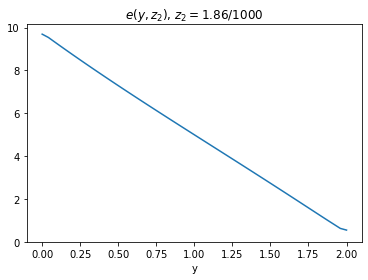

In [30]:
plt.plot(y_grid, e_grid[25])
plt.xlabel('y')
plt.title(r'$e(y, z_2)$, $z_2=1.86/1000$')
plt.ylim(0, None)
plt.savefig('emission.pdf')

In [ ]:
@njit
def simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=100):
    Et = np.zeros(T+1)
    z = z_grid[z_loc]
    for i in range(T+1):
        Et[i] = np.interp(yoz_start*z, y_grid, e_grid[z_loc])
        yoz_start = yoz_start + Et[i]
    return Et


@njit(parallel=True)
def simulate_capital(α_k, β_k, σ_k, β_z, σ_z, ioverk, κ, Ws, k_start, N=100_000, T=100, dt=1.):
    var_z = dt*σ_z@σ_z/(1-(1-β_z*dt)**2)
    std_z = np.sqrt(var_z)

    time_periods = int(T/dt)
    z_path = np.zeros((N, time_periods+1))
    k_path = np.zeros((N, time_periods+1))
    for i in range(N):
        z0 = np.random.normal(0.,std_z)
        k0 = k_start
        z_path[i, 0] = z0
        k_path[i, 0] = k0
        for j in range(1, time_periods+1):
            k1 = k0 + (α_k + β_k*z0 + ioverk - κ/2.*ioverk**2 - σ_k@σ_k/2.)*dt + σ_k@Ws[i, j]*np.sqrt(dt)
            z1 = (1.-β_z*dt)*z0 + σ_z@Ws[i, j]*np.sqrt(dt)
            k_path[i, j] = k1
            z_path[i, j] = z1
            k0 = k1
            z0 = z1
    return k_path

In [ ]:
T = 100
Et = simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=T)

In [ ]:
plt.figure()
plt.title('Emission trajectory')
plt.plot(Et)
plt.xlabel('Year')

## SCC computation

$$
SCC = ME(y, z_2) \frac{(\alpha-i^*)\exp(k-n)}{\delta(1-\eta)}
$$

In our uncertainty decompositions, we compute $ME$ in the following four steps:

i) compute
$$
ME_1(y, z_2) = (1-\eta)\left(\sum_{j=1}^J\pi_jz_2\frac{d}{d \tau}\Lambda_j (y)\right)
$$

ii) construct
$$
U(y, z_2) = (1-\eta) \left[\sum_{j=1}^J\pi_jz_2^2 \frac{d^2}{d\tau^2}\Lambda_j (y) e^*(y, z_2)\right]
$$

iii) solve
$$
0 = -\delta f + \frac{\partial f}{\partial y}e^* + \frac{\partial f}{\partial z_2}\left[-\rho(z_2 - \sum_{j}^J \pi_j\mu_{2,j})\right] + \left[\frac{\partial^2 f}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)
$$

iv) then $ME_2(y, z_2)=f(y, z_2)$, and $ME(y, z_2) = ME_1(y, z_2) + ME_2(y, z_2)$